In [527]:
import pandas as pd 
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# on a besoin du module nltk (nécessite une installation)
import nltk 

## Dataframe

In [528]:
df = pd.read_csv('df.csv')
df

,Note,Commentaire
0,"4,0",une bonne suite pour les aventures de sonic au...
1,"5,0",Cette suite de sonic est incroyable !Le fan qu...
2,"4,0","Super film de ouf, le fait que Knuckles soit d..."
3,"4,0",Très bon film ont retrouve ce qui fait l’espri...
4,"2,5",Bon alors je trouve que la transposition de l'...
...,...,...
2900,"2,5",Agréablement surpris! Des effets spéciaux impr...
2901,"4,0",E-NOR-ME !!!!Le jeu de TOUS les acteurs est tr...
2902,"5,0",Qu'elle film!!Je conseil a tous ce chef d'oeuv...
2903,"5,0","Bon, DiCaprio commence vraiment à me gonfler! ..."


## Nuage de mots

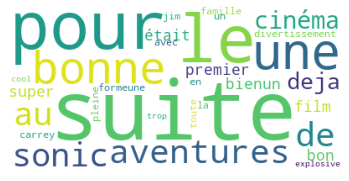

In [529]:
liste= df['Commentaire'].values.tolist()

WC=WordCloud(background_color = 'white',max_words = 100).generate(liste[0])


plt.imshow(WC)
plt.axis("off")
plt.show()

## Préparation des données

### Tokenisation

#### Sentence Tokenization

In [530]:
from nltk.tokenize import sent_tokenize

liste_token = []

for x in df['Commentaire']:
    tokenized_text=sent_tokenize(x)
    liste_token.append(tokenized_text)



#### Word Tokenization

In [531]:
from nltk.tokenize import word_tokenize

liste_token_word = []

for x in df['Commentaire'] :
    tokenized_word=word_tokenize(x)
    liste_token_word.append(tokenized_word)
print(tokenized_word)

['Après', 'avoir', 'vu', 'ce', 'film', ',', 'je', "n'ai", "qu'une", 'conclusion', ',', 'Christopher', 'Nolan', 'est', 'un', 'génie', '.', 'Après', 'le', 'fantastique', '``', 'Dark', 'Knight', "''", ',', 'il', 'nous', 'pond', 'ce', 'fabuleux', 'film', 'sur', 'les', 'rêves', '.', 'Pas', 'question', 'de', 'vous', 'parler', 'du', 'scènario', 'qui', 'est', 'comme', 'habituellement', 'chez', 'ce', 'réalisateur', 'fantastique', '.', 'Cette', 'fois', 'Nolan', 'nous', 'sort', 'une', 'magnifique', 'histoire', 'sur', 'la', 'manipulation', 'de', 'personnes', 'à', 'travers', 'leurs', 'rêves', '.', 'Ce', 'scénario', 'qui', 'peut', 'paraître', 'assez', 'compliqué', 'et', 'confus', ',', 'est', 'une', 'réflexion', 'intelligeante', 'sur', 'le', 'rôle', 'des', 'rêves', ',', 'et', 'notre', 'désir', 'déchapper', 'à', 'la', 'réalité', ',', 'et', 'de', 'créer', 'en', 'quelque', 'sorte', 'notre', 'propre', 'réalité', '.', 'Après', 'il', 'a', 'les', 'acteurs', 'qui', 'livrent', 'une', 'interprétation', 'sublim

### Frequency Distribution

In [532]:
from nltk.probability import FreqDist

somme_token = liste_token_word[1]
    
fdist = FreqDist(somme_token)
print(fdist)

<FreqDist with 95 samples and 135 outcomes>


In [533]:
fdist.most_common(2)

[(',', 9), ('!', 7)]

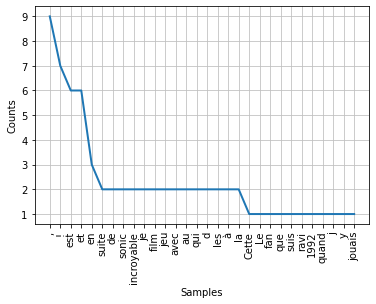

In [534]:
# Frequency Distribution Plot
import matplotlib.pyplot as plt
fdist.plot(30,cumulative=False)
plt.show()

### Stopwords

In [535]:
from nltk.corpus import stopwords
stop_words=set(stopwords.words("french"))
print(stop_words)

{'s', 'ton', 'aie', 'qui', 'm', 'que', 'nos', 'eusses', 'd', 'étiez', 't', 'un', 'auront', 'me', 'étante', 'ses', 'fussiez', 'êtes', 'de', 'aurai', 'auras', 'lui', 'seraient', 'eus', 'à', 'ait', 'sois', 'moi', 'vos', 'fût', 'je', 'une', 'étions', 'étantes', 'aurait', 'au', 'il', 'n', 'étais', 'pas', 'sa', 'étée', 'avec', 'pour', 'l', 'dans', 'eussions', 'fussent', 'on', 'eûmes', 'étaient', 'serait', 'ai', 'le', 'fûtes', 'votre', 'étés', 'eues', 'tes', 'soyez', 'eussiez', 'sommes', 'avaient', 'les', 'la', 'ou', 'eût', 'serez', 'fussions', 'ayante', 'es', 'serais', 'vous', 'fûmes', 'sur', 'même', 'eux', 'seras', 'aies', 'sera', 'fus', 'fusse', 'eusse', 'avons', 'toi', 'ne', 'suis', 'aurions', 'avez', 'soyons', 'seront', 'ayants', 'eussent', 'serions', 'ce', 'est', 'ces', 'j', 'eûtes', 'ayons', 'son', 'aviez', 'auraient', 'eut', 'ayant', 'nous', 'par', 'soit', 'ayantes', 'qu', 'aurons', 'avais', 'avait', 'fusses', 'elle', 'aurez', 'eurent', 'as', 'fut', 'eue', 'eu', 'été', 'en', 'sont', '

### Suppression des accents

In [536]:
df['Commentaire'] = df['Commentaire'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
df.head()

,Note,Commentaire
0,"4,0",une bonne suite pour les aventures de sonic au...
1,"5,0",Cette suite de sonic est incroyable !Le fan qu...
2,"4,0","Super film de ouf, le fait que Knuckles soit d..."
3,"4,0",Tres bon film ont retrouve ce qui fait lesprit...
4,"2,5",Bon alors je trouve que la transposition de l'...


In [537]:
import re 

REMPLACE_SANS_ESPACE = re.compile("[;:!\'?,\"()\[\],']")
REMPLACE_AVEC_ESPACE = re.compile("()|(-)|(/)|[.’]")
PUR_NOMBRE = re.compile("[0-9]")

# def setClassBin(i):
#     if (float(i.replace(',', '.')) > 3):
#         return 1
#     else:
#         return 0

def preprocess(txt):
    txt = [PUR_NOMBRE.sub("", (str(line)).lower()) for line in txt] # retire les nombres (comme les années)
    txt = [line.replace('\n', ' ')  for line in txt] # Retire les \n (retours chariots)
    txt = [REMPLACE_SANS_ESPACE.sub(" ", line.lower()) for line in txt]
    txt = [REMPLACE_AVEC_ESPACE.sub("", line) for line in txt]
    return txt

In [538]:
df["Commentaire"]=preprocess(df["Commentaire"])

In [539]:
# On ajoute la liste au dataframe

df["Traitement_1"] = df["Commentaire"]
df

,Note,Commentaire,Traitement_1
0,"4,0",une bonne suite pour les aventures de sonic au...,une bonne suite pour les aventures de sonic au...
1,"5,0",cette suite de sonic est incroyable le fan qu...,cette suite de sonic est incroyable le fan qu...
2,"4,0",super film de ouf le fait que knuckles soit d...,super film de ouf le fait que knuckles soit d...
3,"4,0",tres bon film ont retrouve ce qui fait lesprit...,tres bon film ont retrouve ce qui fait lesprit...
4,"2,5",bon alors je trouve que la transposition de l ...,bon alors je trouve que la transposition de l ...
...,...,...,...
2900,"2,5",agreablement surpris des effets speciaux impr...,agreablement surpris des effets speciaux impr...
2901,"4,0",enorme le jeu de tous les acteurs est tres...,enorme le jeu de tous les acteurs est tres...
2902,"5,0",qu elle film je conseil a tous ce chef d oeuv...,qu elle film je conseil a tous ce chef d oeuv...
2903,"5,0",bon dicaprio commence vraiment a me gonfler ...,bon dicaprio commence vraiment a me gonfler ...


## Suppression des stopwords

In [540]:
import pandas as pd

df['Traitement_1'] = df['Traitement_1'].astype(str)

In [541]:
ftoken = lambda x: [word.lower() for word in word_tokenize(x) if word not in (stop_words)]
df["Traitement_2"] = df["Traitement_1"].apply(ftoken)
df.head()

,Note,Commentaire,Traitement_1,Traitement_2
0,"4,0",une bonne suite pour les aventures de sonic au...,une bonne suite pour les aventures de sonic au...,"[bonne, suite, aventures, sonic, cinema, deja,..."
1,"5,0",cette suite de sonic est incroyable le fan qu...,cette suite de sonic est incroyable le fan qu...,"[cette, suite, sonic, incroyable, fan, ravi, q..."
2,"4,0",super film de ouf le fait que knuckles soit d...,super film de ouf le fait que knuckles soit d...,"[super, film, ouf, fait, knuckles, cote, eggma..."
3,"4,0",tres bon film ont retrouve ce qui fait lesprit...,tres bon film ont retrouve ce qui fait lesprit...,"[tres, bon, film, retrouve, fait, lesprit, son..."
4,"2,5",bon alors je trouve que la transposition de l ...,bon alors je trouve que la transposition de l ...,"[bon, alors, trouve, transposition, univers, s..."


In [542]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
import re


filtre = []

for element in df["Commentaire"] :
    stopWords = set(stopwords.words('french'))
    words = word_tokenize(element)
    for w in words:
        if w not in stopWords:
#         w = w.lower()
            w = w.replace('\n', ' ')

            filtre.append(w)


In [543]:
len(filtre)

189041

### Nombre d'occurences qui reviennent le plus souvent

In [544]:
from nltk.probability import FreqDist
   
fdist = FreqDist(filtre)
print(fdist)

<FreqDist with 12974 samples and 189041 outcomes>


In [545]:
fdist.most_common(5)

[('a', 8581), ('film', 5672), ('tres', 2598), ('sonic', 2228), ('plus', 1963)]

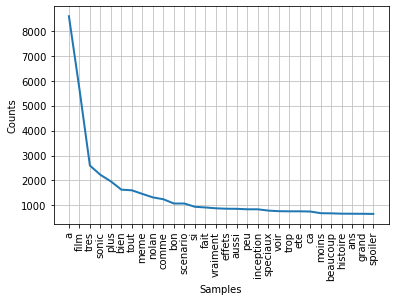

In [546]:
# Frequency Distribution Plot
import matplotlib.pyplot as plt
fdist.plot(30,cumulative=False)
plt.show()

### Suppression des termes inutiles 

In [547]:
liste_supp = ["a", "film", "sonic", "nolan", "inception", "scenario", "spoiler"]

for x in filtre :
    if x in liste_supp :
        filtre.remove(x)

In [549]:
fdist = FreqDist(filtre)
print(fdist)

<FreqDist with 12974 samples and 170208 outcomes>


In [550]:
fdist.most_common(5)

[('tres', 2598),
 ('plus', 1963),
 ('bien', 1632),
 ('tout', 1607),
 ('meme', 1462)]

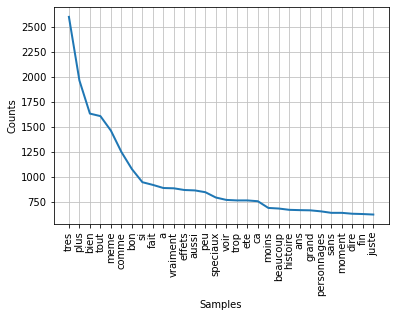

In [551]:
# Frequency Distribution Plot
import matplotlib.pyplot as plt
fdist.plot(30,cumulative=False)
plt.show()

In [552]:
len(filtre)

170208

## Normalization

### Stemming

In [553]:
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

ps = PorterStemmer()

stemmed_words=[]
for w in filtre:
    stemmed_words.append(ps.stem(w))

In [554]:
from nltk.stem.snowball import SnowballStemmer

stemming = SnowballStemmer(language='french')

fonction_stemming = lambda x: ' '.join([stemming.stem(word) for word in x])
df["Traitement_2"] = df["Traitement_2"].apply(fonction_stemming)

print(df)

     Note                                        Commentaire  \
0     4,0  une bonne suite pour les aventures de sonic au...   
1     5,0  cette suite de sonic est incroyable  le fan qu...   
2     4,0  super film de ouf  le fait que knuckles soit d...   
3     4,0  tres bon film ont retrouve ce qui fait lesprit...   
4     2,5  bon alors je trouve que la transposition de l ...   
...   ...                                                ...   
2900  2,5  agreablement surpris  des effets speciaux impr...   
2901  4,0  enorme     le jeu de tous les acteurs est tres...   
2902  5,0  qu elle film  je conseil a tous ce chef d oeuv...   
2903  5,0  bon  dicaprio commence vraiment a me gonfler  ...   
2904  5,0  apres avoir vu ce film  je n ai qu une conclus...   

                                           Traitement_1  \
0     une bonne suite pour les aventures de sonic au...   
1     cette suite de sonic est incroyable  le fan qu...   
2     super film de ouf  le fait que knuckles soit d..

###  Modification de la colonne "Note"

In [557]:
def setClassBin(i):
    if (float(i.replace(',', '.')) > 3):
        return 1
    else:
        return 0
yList = [setClassBin(x) for x in df['Note']]
df.drop(['Note'], axis=1)

,Commentaire,Traitement_1,Traitement_2
0,une bonne suite pour les aventures de sonic au...,une bonne suite pour les aventures de sonic au...,bon suit aventur sonic cinem dej premi film et...
1,cette suite de sonic est incroyable le fan qu...,cette suite de sonic est incroyable le fan qu...,cet suit sonic incroi fan rav quand jou megadr...
2,super film de ouf le fait que knuckles soit d...,super film de ouf le fait que knuckles soit d...,sup film ouf fait knuckl cot eggman debut refe...
3,tres bon film ont retrouve ce qui fait lesprit...,tres bon film ont retrouve ce qui fait lesprit...,tre bon film retrouv fait lespr sonic film cla...
4,bon alors je trouve que la transposition de l ...,bon alors je trouve que la transposition de l ...,bon alor trouv transposit univer sonic mond re...
...,...,...,...
2900,agreablement surpris des effets speciaux impr...,agreablement surpris des effets speciaux impr...,agreabl surpr effet special impression paris r...
2901,enorme le jeu de tous les acteurs est tres...,enorme le jeu de tous les acteurs est tres...,enorm jeu tous acteur tre bien mem mario cotil...
2902,qu elle film je conseil a tous ce chef d oeuv...,qu elle film je conseil a tous ce chef d oeuv...,film conseil a tous chef oeuvr fer pass h bonheur
2903,bon dicaprio commence vraiment a me gonfler ...,bon dicaprio commence vraiment a me gonfler ...,bon dicaprio commenc vrai a gonfl fais part ce...


In [558]:
df["Note"] = yList

In [559]:
df

,Note,Commentaire,Traitement_1,Traitement_2
0,1,une bonne suite pour les aventures de sonic au...,une bonne suite pour les aventures de sonic au...,bon suit aventur sonic cinem dej premi film et...
1,1,cette suite de sonic est incroyable le fan qu...,cette suite de sonic est incroyable le fan qu...,cet suit sonic incroi fan rav quand jou megadr...
2,1,super film de ouf le fait que knuckles soit d...,super film de ouf le fait que knuckles soit d...,sup film ouf fait knuckl cot eggman debut refe...
3,1,tres bon film ont retrouve ce qui fait lesprit...,tres bon film ont retrouve ce qui fait lesprit...,tre bon film retrouv fait lespr sonic film cla...
4,0,bon alors je trouve que la transposition de l ...,bon alors je trouve que la transposition de l ...,bon alor trouv transposit univer sonic mond re...
...,...,...,...,...
2900,0,agreablement surpris des effets speciaux impr...,agreablement surpris des effets speciaux impr...,agreabl surpr effet special impression paris r...
2901,1,enorme le jeu de tous les acteurs est tres...,enorme le jeu de tous les acteurs est tres...,enorm jeu tous acteur tre bien mem mario cotil...
2902,1,qu elle film je conseil a tous ce chef d oeuv...,qu elle film je conseil a tous ce chef d oeuv...,film conseil a tous chef oeuvr fer pass h bonheur
2903,1,bon dicaprio commence vraiment a me gonfler ...,bon dicaprio commence vraiment a me gonfler ...,bon dicaprio commenc vrai a gonfl fais part ce...


## Visualisation des notes

In [560]:
# conversion de la colonne en float
df['Note'] = df['Note'].astype(float)

In [561]:
# Nombre total de notes
len(df['Note'])

2905

In [562]:
somme_p = 0
somme_n = 0

for x in df['Note']:
    if x == 1 :
        somme_p += 1
    elif x == 0 :
        somme_n += 1

print("Nb de commentaires positifs : ", somme_p, "\nNb de commentaires négatifs : ", somme_n)

# somme totale
total = somme_p + somme_n
print("Nombre total de commentaires : ", total)
    

Nb de commentaires positifs :  2234 
Nb de commentaires négatifs :  671
Nombre total de commentaires :  2905


### Pourcentage de commentaires négatifs

In [563]:
print(somme_n/total*100, "%")

23.098106712564544 %


### Pourcentage de commentaires positifs

In [564]:
print(somme_p/total * 100, "%")

76.90189328743546 %


### La note moyenne est de : 

In [565]:
df['Note'].mean()

0.7690189328743545

### Visualisation graphique : 

<AxesSubplot:ylabel='Note'>

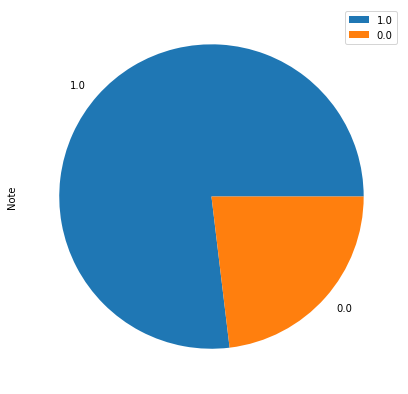

In [566]:
df["Note"].value_counts(normalize=True).plot.pie(legend=True, figsize=(7, 7))

<AxesSubplot:xlabel='Note'>

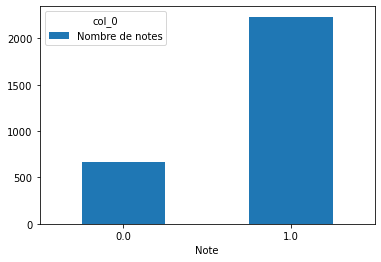

In [567]:
t = pd.crosstab(df.Note, "Nombre de notes")

t.plot.bar(rot=0)

#### Conclusion : 

Il y a donc une prépondérance de notes positives, ce qui risque de fausser notre modèle lors de l'entraînement de ce dernier. Pour résoudre ce problème il faut augmenter le jeu de données des commentaires négatifs.

---

# Data augmentation

**Note : Cette partie n'est pas à jour.
Par ailleurs, l'exécution du programme de traduction met un certain temps à se réaliser (30min environ) d'où les enregistrements en fichier txt.**

On va récupérer tous les commentaires négatifs, récupérer chaque mot et les traduire en anglais. Puis on va à nouveau les traduire, en français cette fois. Cela nous permettra d'obtenir des synonymes et grossir ainsi notre data.

In [38]:
# filtre pour ne récupérer que les commentaires négatifs

df_neg = df[df["Note"]==0]

In [39]:
df_neg

,Note,Commentaire
4,0,bon alors je trouve que la transposition de l ...
5,0,malgre deux nouveaux personnages de l univers ...
10,0,sonic est une suite paresseuse et opportuni...
11,0,postgeneriqueplus ambitieux que le premier sur...
14,0,sonic se reve en justicier facon superheros ...
...,...,...
2883,0,un traqueur de reves est devenu un fugitif sa ...
2884,0,tres bon film dommage que la scene final gach...
2890,0,une etoile pour les effetssinon le reste
2897,0,scenario sans consistance et acteur principal ...


In [41]:
# On tokenise et supprime les stopwords

liste_neg = []


for element in df_neg["Commentaire"] :
    stopWords = set(stopwords.words('french'))
    words = word_tokenize(element)
    for w in words :
        if w not in stopWords:
#         w = w.lower()
            w = w.replace('\n', ' ')

            liste_neg.append(w)

### Suppression des mots inutiles dans les commentaires négatifs

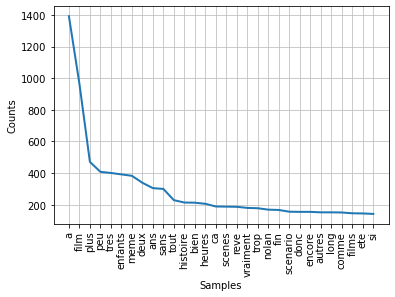

In [43]:
fdist = FreqDist(liste_neg)

# Frequency Distribution Plot
import matplotlib.pyplot as plt
fdist.plot(30,cumulative=False)
plt.show()

In [44]:
# nombre d'éléments dans la liste
len(liste_neg)

35179

In [45]:
# suppression des termes inutiles
liste_supp = ["a", "film", "films", "sonic", "nolan", "inception", "scenario", "spoiler", "jim", "carrey"]

for x in liste_neg :
    if x in liste_supp :
        liste_neg.remove(x)

In [46]:
# nombre d'éléments dans la liste
len(liste_neg)

32207

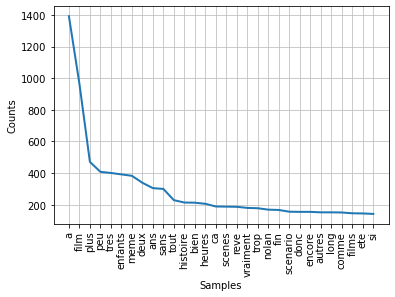

In [48]:
# Frequency Distribution Plot
import matplotlib.pyplot as plt
fdist.plot(30,cumulative=False)
plt.show()

In [49]:
# réduire le nombre de mots en supprimant les doublons
# on transforme la liste en dico, on supprime les doublons, on retransforme en liste

mylist = list(dict.fromkeys(liste_neg))
print(mylist)

['bon', 'alors', 'trouve', 'transposition', 'univers', 'monde', 'reel', 'assez', 'reussie', 'personnages', 'attachants', 'ecriture', 'plutot', 'correcte', 'rigolos', 'succedent', 'succulent', 'robotnik', 'completement', 'barge', 'contre', 'vrai', 'passe', 'ans', 'risque', 'ennuyer', 'tant', 'plat', 'quarantenaires', 'quete', 'references', 'approchant', 'materiau', 'orignal', 'aussi', 'peu', 'decus', 'manque', 'substance', 'disons', 'ca', 'pu', 'etre', 'pire', 'malgre', 'deux', 'nouveaux', 'jeu', 'video', 'knuckles', 'tails', 'loin', 'catchline', 'affiche', 'fois', 'plus', 'fun', 'tend', 'vers', 'moins', 'etonnement', 'si', 'refere', 'premier', 'opus', 'sorti', 'double', 'merite', 'nouveaute', 'effet', 'surprisec', 'malheureusement', 'suites', 'faut', 'savoir', 'conforter', 'fans', 'zone', 'connue', 'appreciee', 'reussir', 'egalement', 'relancer', 'interet', 'osant', 'quelques', 'nouvelles', 'recettesce', 'version', 'distrait', 'amuse', 'rythme', 'souvent', 'soutenu', 'certain', 'arrive

In [50]:
# nombre d'éléments dans la liste
len(mylist)

6475

### Création d'une liste de mots négatifs dans un txt

In [83]:
# enregistrer les mots dans une liste

# On crée un fichier txt
f = open("liste_mots_neg.txt", "x")

In [84]:
# On ajoute chaque mot dans le fichier
f = open("liste_mots_neg.txt", "a")
for x in mylist :
    f.write(x+"\n")
f.close()

##  Traduire chaque mot et l'ajouter au jeu de données

In [60]:
from tqdm import tqdm
from googletrans import Translator, constants
from pprint import pprint

mots_trad = []
translator = Translator()


for x in tqdm(mylist) :
    traduction = translator.translate(x)
    mots_trad.append(traduction.text)

100%|██████████████████████████████████████████████████████████████████████████████| 6475/6475 [29:55<00:00,  3.61it/s]


In [65]:
# On supprime les caractères vides
liste_supp = ["", " ", "  ", "    ", "     "]

for x in mots_trad :
    if x in liste_supp :
        mots_trad.remove(x)

In [66]:
len(mots_trad)

6474

In [80]:
# enregistrer les mots dans une liste

# On crée un fichier txt
# f = open("mots_traduits.txt", "x")

# On ajoute chaque mot dans le fichier
with open('mots_traduits.txt', 'w', encoding="utf-8") as f:
    for line in mots_trad:
        f.write(line)
        f.write('\n')
f.close()

#### Traduire de l'anglais au français

In [69]:
mots_fr = []
translator = Translator()


for x in tqdm(mots_trad) :
    traduction = translator.translate(x, src = 'en', dest='fr')
    mots_fr.append(traduction.text)

100%|██████████████████████████████████████████████████████████████████████████████| 6474/6474 [29:45<00:00,  3.63it/s]


In [81]:
# enregistrer les mots dans une liste

# On crée un fichier txt
# f = open("mots_trad_fr.txt", "x")

# On ajoute chaque mot dans le fichier
with open('mots_trad_fr.txt', 'w', encoding="utf-8") as f:
    for line in mots_fr:
        f.write(line)
        f.write('\n')
f.close()

In [ ]:
# supprimer les doublons pour réduire le jeu de données (données superflues)

In [86]:
# traduire de l'anglais au fr
# ajouter la nouvelle liste à l'ancienne
new_data = filtre + mots_fr
# split train_test
# entraînement du modèle

In [88]:
len(filtre)

170208

In [87]:
len(new_data)

176682

---

## Séparation des données en X et y

In [373]:
X = df['Traitement_2']
y = df['Note']

### Split train-test

In [374]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

# taille respective :
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((2324,), (2324,), (581,), (581,))

In [376]:
X_train

2631    exellent film montr comment march rev inconsci...
188     suit premi volet introduit nouveau personnag c...
900     superb suitel er etait top second rempl contra...
2072    tout simpl chef oeuvr comm exist peu aujourd h...
2397    film genr voit tre rar quas a chaqu fois chez ...
                              ...                        
763     film just incroi pass excellent moment vu h fi...
835     ador film beaucoup mieux premi loin trop aim c...
1653    scenario grandios uniqu acteur mis scen parfai...
2607    excellent film etais trop chaud a aller voir a...
2732                                               superb
Name: Traitement_2, Length: 2324, dtype: object

## Bag of Words et vectorisation

In [377]:
liste = []

for x in df['Traitement_2']:
    liste.append(x)
    

In [378]:
len(liste)

2905

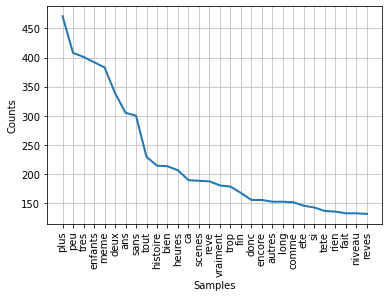

In [379]:
fdist = FreqDist(liste_neg)

# Frequency Distribution Plot
import matplotlib.pyplot as plt
fdist.plot(30,cumulative=False)
plt.show()

In [475]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

CountVec = CountVectorizer()
Count_data = CountVec.fit_transform(liste)
# X_test_vec = CountVec.fit_transform(X_test)

Count_data.shape

(2905, 8748)

In [476]:
CountVec.vocabulary_

{'bon': 851,
 'suit': 7894,
 'aventur': 619,
 'sonic': 7688,
 'cinem': 1306,
 'dej': 2089,
 'premi': 6420,
 'film': 3370,
 'etait': 3045,
 'sup': 7912,
 'bienun': 785,
 'divert': 2461,
 'tout': 8256,
 'famill': 3270,
 'jim': 4496,
 'carrey': 1091,
 'plein': 6241,
 'formeun': 3504,
 'explos': 3192,
 'trop': 8350,
 'cool': 1683,
 'cet': 1173,
 'incroi': 4164,
 'fan': 3272,
 'rav': 6772,
 'quand': 6645,
 'jou': 4518,
 'megadr': 5182,
 'montr': 5400,
 'devenu': 2286,
 'dingu': 2382,
 'univer': 8411,
 'jeu': 4486,
 'parfait': 5927,
 'respect': 7072,
 'amour': 305,
 'passion': 5993,
 'spoil': 7798,
 'tail': 8033,
 'avion': 629,
 'knuckl': 4586,
 'robotnik': 7238,
 'robot': 7235,
 'guep': 3775,
 'fond': 3485,
 'eau': 2579,
 'absorb': 28,
 'bull': 985,
 'oxygen': 5851,
 'emeraud': 2745,
 'clin': 1360,
 'droit': 2549,
 'gauch': 3634,
 'rendent': 6988,
 'hommag': 3913,
 'sang': 7338,
 'transform': 8284,
 'just': 4554,
 'magnif': 5011,
 'histoir': 3895,
 'toujour': 8238,
 'auss': 577,
 'sympath':

In [477]:
# création d'un dataframe
cv_dataframe=pd.DataFrame(Count_data.toarray(),columns=CountVec.get_feature_names())
cv_dataframe

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aahahahahah,aakhen,aaron,abandon,abandonne,abasourd,abattag,abattr,abattu,abbus,...,zero,zest,zeus,zimm,zimmerincept,zimmernolan,zimmerquand,zimmerun,zizan,zon
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2900,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2901,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2902,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2903,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [482]:
X_train.shape

(2324,)

In [483]:
X_test.shape

(581,)

## TF-IDF

In [526]:
# tf_idf_vec = TfidfVectorizer()
# tf_idf_data = tf_idf_vec.transform(X_train)

 
# # création d'un dataframe
# tf_idf_df=pd.DataFrame(tf_idf_data.toarray(),columns=tf_idf_vec.get_feature_names())
# tf_idf_df

NotFittedError: The TF-IDF vectorizer is not fitted

In [524]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(X_train.astype(str))
normdf = le.transform(X_train.astype(str))

In [525]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train, y_train)
X_new_counts = count_vect.transform(X_train)
X_new_tfidf = tfidf_transformer.transform(X_new_counts)

predicted = clf.predict(X_new_tfidf)

for doc, category in zip(docs_new, predicted):
     print('%r => %s' % (doc, twenty_train.target_names[category]))

ValueError: could not convert string to float: 'exellent film montr comment march rev inconscient subconscient comment simpl ide sem tet quelqu peut deven si import parfois mem danger peut constat quand femm suicid car croit plus a cet realit peut voir point matrix effet special exellent musiqu tre bien apprpri film scen film tient halein pend tout dure fin vrai magnif grand christoph nolan chapeau'

In [486]:
X_test_vec = tf_idf_vec.fit_transform(X_test)

## Régression logisitique

In [508]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

In [509]:
lr.fit(tf_idf_data, y_train)

LogisticRegression()

In [512]:
y_train.shape, y_test.shape

((2324,), (581,))

In [511]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

for c in [0.01, 0.05, 0.25, 0.5, 1]:
    lr = LogisticRegression(C=c,solver='liblinear', random_state=0, max_iter=150)
    lr.fit(tf_idf_data, y_train)
    y_pred_test = lr.predict(X_test_vec)
    print ("Précision pour C=%s: %s" % (c, round(accuracy_score(y_test, y_pred_test),4)))

ValueError: X has 3663 features, but LogisticRegression is expecting 7881 features as input.

In [510]:
predictions = lr.predict(X_test_vec)

ValueError: X has 3663 features, but LogisticRegression is expecting 7881 features as input.

## SVM linéaire

In [513]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV


clf = LinearSVC(max_iter=10000, C=0.1)

In [514]:
def fit_vectorizers(vectorizer):
    pipeline = Pipeline(
    [
        ("vect", vectorizer()),
        ("scaling", StandardScaler(with_mean=False)),
        ("clf", clf),
    ]
    )

    parameters = {
        "vect__ngram_range": ((1, 1), (1, 2)),  # unigrams or bigrams
        "vect__stop_words": ("english", None)
    }

    grid_search = GridSearchCV(pipeline, parameters, scoring='f1_micro',
                               cv=4, n_jobs=4, verbose=1)
    grid_search.fit(X_train, y_train)

    best_parameters = grid_search.best_estimator_.get_params()
    for param_name in sorted(parameters.keys()):
        print("\t%s: %r" % (param_name, best_parameters[param_name]))

    print(f"CV scores {grid_search.cv_results_['mean_test_score']}")
    print(f"Mean F1 {np.mean(grid_search.cv_results_['mean_test_score'])}")
    
    return grid_search

In [504]:
cv_bow = fit_vectorizers(CountVectorizer)

Fitting 4 folds for each of 4 candidates, totalling 16 fits
	vect__ngram_range: (1, 1)
	vect__stop_words: None
CV scores [0.89672978 0.89845095 0.88166954 0.88166954]
Mean F1 0.8896299483648882


In [505]:
cv_tfidf = fit_vectorizers(TfidfVectorizer)

Fitting 4 folds for each of 4 candidates, totalling 16 fits
	vect__ngram_range: (1, 1)
	vect__stop_words: 'english'
CV scores [0.90920826 0.90920826 0.88898451 0.8894148 ]
Mean F1 0.8992039586919105


In [506]:
from sklearn import svm
clf=svm.LinearSVC()

In [507]:
clf.fit(tf_idf_data,y_train)

res= clf._predict_proba_lr(X_test_vec)

ValueError: X has 3663 features, but LinearSVC is expecting 7881 features as input.